<a href="https://colab.research.google.com/github/alammobaDar/CCADMACL_EXERCISES_COM231ML/blob/main/Exercise4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

from plotly.express import scatter_3d
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [147]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [149]:
X = df.drop('target', axis=1)

1. Perform scaling `(10 pts)`

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
x_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


2. Perform dimensionality reduction using PCA `(10 pts)`

In [151]:
pca = PCA(n_components=3)

X_reduced = pca.fit_transform(X_scaled)


3. Get the total explained variance `(5 pts)`

In [152]:
explained_variance = pca.explained_variance_ratio_

PC1_variance = explained_variance[0]
PC2_variance = explained_variance[1]
PC3_variance = explained_variance[2]

print(f"Explained variance for PC1: {PC1_variance}")
print(f"Explained variance for PC2: {PC2_variance}")
print(f"Explained variance for PC3: {PC3_variance}")

# total_variance =  PC1_variance + PC2_variance
total_variance =  PC1_variance + PC2_variance + PC3_variance

print(f"Total Variance accumulated: {total_variance}")

Explained variance for PC1: 0.44272025607526366
Explained variance for PC2: 0.18971182044033078
Explained variance for PC3: 0.09393163257431389
Total Variance accumulated: 0.7263637090899083


4. Plot the explained variances of each principal component `(5 pts)`

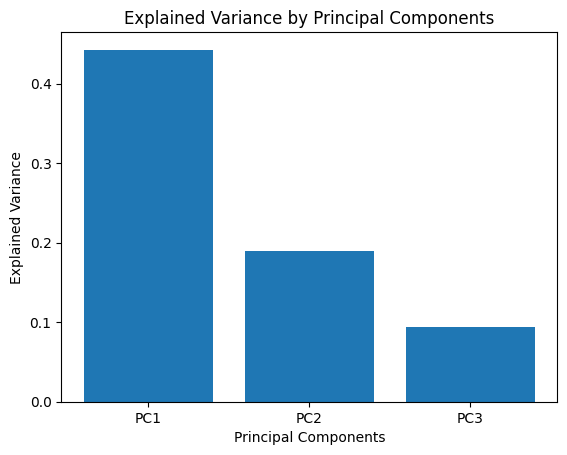

In [153]:
plt.bar(['PC1', 'PC2', 'PC3'], explained_variance)
# plt.bar(['PC1', 'PC2'], explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

In [154]:
scatter_3d(x=X_reduced[:,0], y=X_reduced[:,1], z=X_reduced[:,2])
# plt.scatter(X_reduced[:,0], X_reduced[:,1])
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Visualization')

6. Perform clustering using any clustering algorithm `(10 pts)`

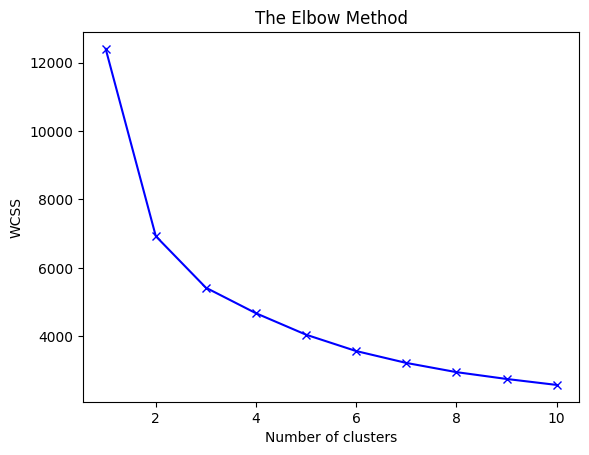

In [155]:
wcss = {}

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_reduced)
  wcss[i] = kmeans.inertia_


plt.plot(wcss.keys(), wcss.values(), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [156]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_reduced)


centroids = kmeans.cluster_centers_

print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [157]:
fig = scatter_3d(x=X_reduced[:,0], y=X_reduced[:,1], z=X_reduced[:,2], color=kmeans.labels_)
fig.add_trace(go.Scatter3d(x=centroids[:,0], y=centroids[:,1], z=centroids[:,2], mode='markers', marker=dict(size=10, color='red')))
fig.show()
# plt.scatter(X_reduced[:,0], X_reduced[:,1]

# plt.scatter(X_reduced[:,0], X_reduced[:,1],c= kmeans.labels_)
# plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths=5, zorder=10)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('Breast Cancer Cluster')

7. View the loading scores of each principal component `(5 pts)`

In [159]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

loading_matrix

,PC1,PC2,PC3
mean radius,0.798469,-0.558394,-0.014334
mean texture,0.378346,-0.142564,0.108454
mean perimeter,0.829965,-0.513800,-0.015649
mean area,0.806101,-0.551755,0.048220
mean smoothness,0.520110,0.444392,-0.175226
mean compactness,0.872817,0.362680,-0.124485
mean concavity,0.942542,0.143660,0.004593
mean concave points,0.951490,-0.083016,-0.042951
mean symmetry,0.503978,0.454506,-0.067609
mean fractal dimension,0.234772,0.875292,-0.037928


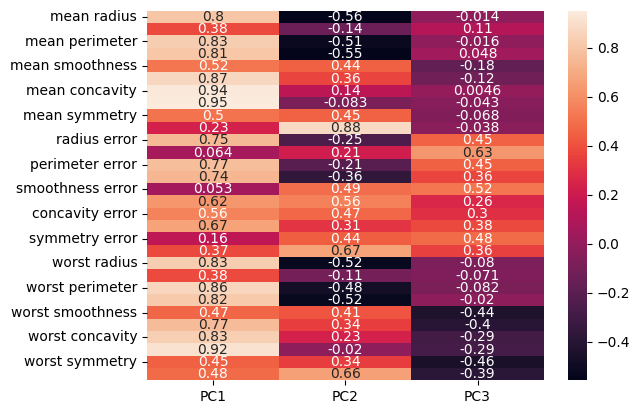

In [160]:
sns.heatmap(loading_matrix, annot=True)
plt.show()